In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from datetime import datetime

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
# %matplotlib inline

liver_data = pd.read_csv('indian_liver_patient.csv')

In [10]:
# Success - Display the first record
display(liver_data.head(n=5))
# liver_data.head(n=5)
# print(datetime.now())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease 71.35506003430532%


<Axes: xlabel='Dataset', ylabel='count'>

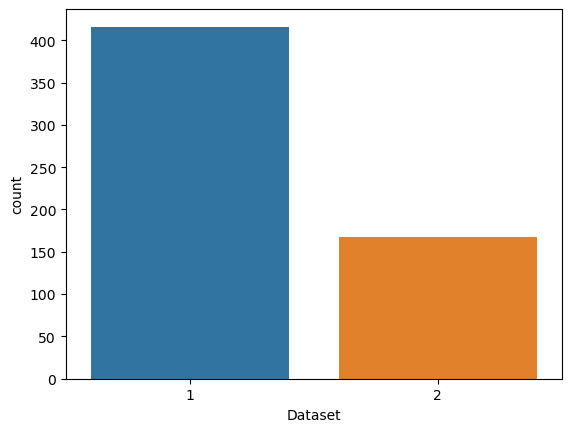

In [15]:
import seaborn as sns

n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100

print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))

sns.countplot(data=liver_data, x = 'Dataset', label='Count')

In [17]:
# Split the data into features and target label
liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
# liver_data_features.head()

In [19]:
#Missing values
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


In [21]:
# fill missing values with median value
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)

albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

/var/folders/r1/lj97jvkd19j0ncb6jxq71wyh0000gn/T/ipykernel_15877/915652353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

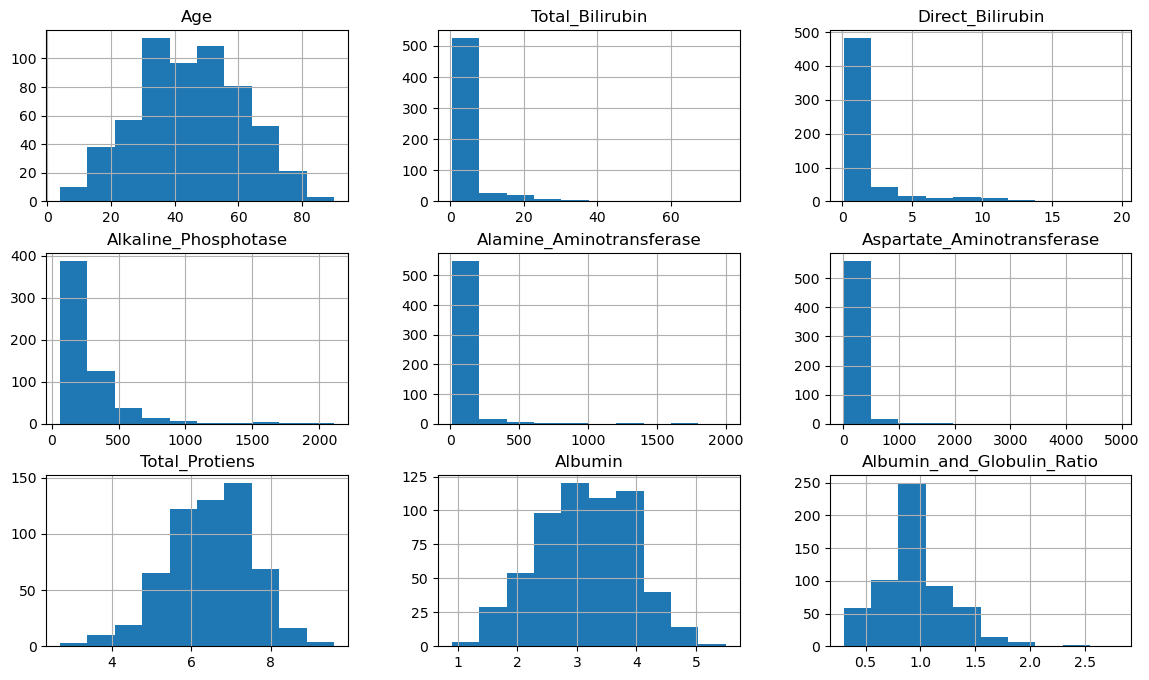

In [23]:
# plot features histogram
liver_data_features.hist(figsize=(14,8))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

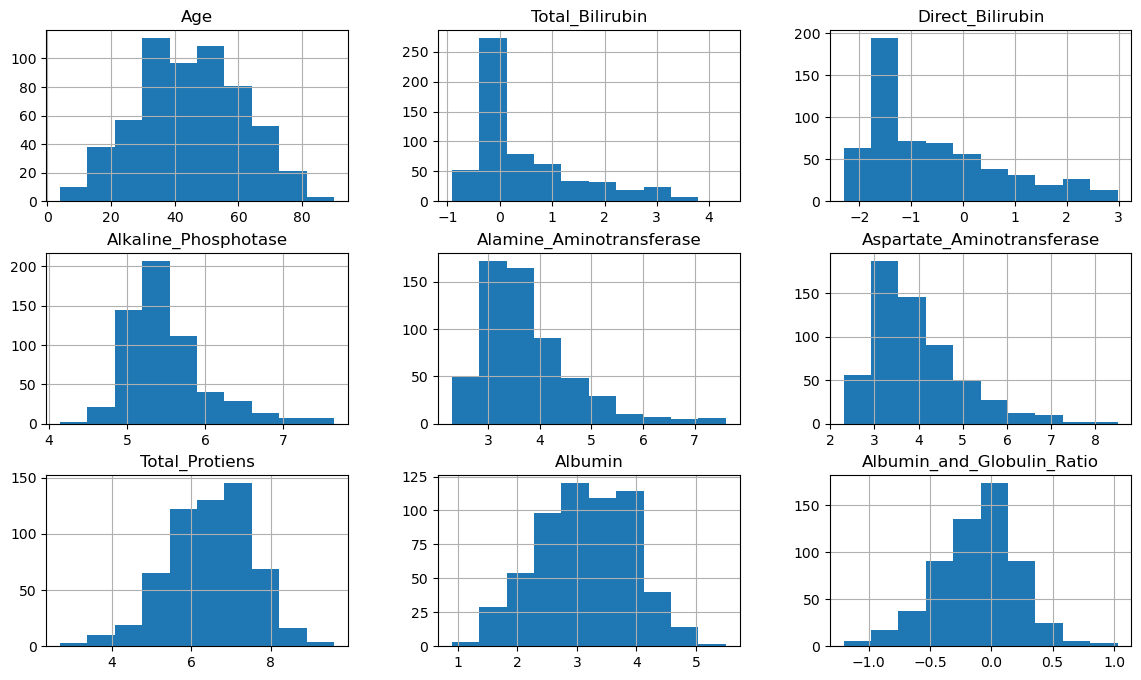

In [24]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] = liver_data_features[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))

In [26]:
# liver_data_features_log_transformed.head()
liver_data_features_log_transformed.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.463421,-0.650373,5.493417,3.751829,3.956771,6.483190,3.141852,-0.111273
std,16.189833,1.018527,1.326394,0.528128,0.900236,0.997381,1.085451,0.795519,0.344530
min,4.000000,-0.916291,-2.302585,4.143135,2.302585,2.302585,2.700000,0.900000,-1.203973
25%,33.000000,-0.223144,-1.609438,5.167635,3.135494,3.218876,5.800000,2.600000,-0.356675
50%,45.000000,0.000000,-1.203973,5.337538,3.555348,3.737670,6.600000,3.100000,-0.072571
75%,58.000000,0.955511,0.262364,5.697093,4.102609,4.465908,7.200000,3.800000,0.095310
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619


In [27]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_minmax_transform = pd.DataFrame(data = liver_data_features_log_transformed)
liver_data_features_log_minmax_transform[numerical] = scaler.fit_transform(liver_data_features_log_transformed[numerical])

display(liver_data_features_log_minmax_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,Female,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859
1,0.674419,Male,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222
2,0.674419,Male,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857
3,0.627907,Male,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030
4,0.790698,Male,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798


In [31]:
liver_data_features_final = pd.get_dummies(liver_data_features_log_minmax_transform, columns=['Gender'])
liver_data_features_final.head(n=3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,0.709302,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859,True,False
1,0.674419,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222,False,True
2,0.674419,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857,False,True


In [33]:
#Assume naive predictor which always predicts liver disease
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))

# TODO: Calculate accuracy, precision and recall
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

# TODO: Calculate F-score using the formula above
beta = 2
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

true positives: 416 | true negatives: 167
accuracy: 0.7135506003430532 | precision: 0.7135506003430532 | recall: 1.0
Naive Predictor: [Accuracy score: 0.7136, F-score: 0.9257]


In [35]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'disease prediction' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final, 
                                                    liver_data_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 24,
                                                    shuffle = True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


In [37]:
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 150 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:150])
    end = time() # Get end time
    
    #  : Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  : Compute accuracy on the first 150 training samples which is y_train[:150]
    results['acc_train'] = accuracy_score(y_train[:150], predictions_train)
        
    #  : Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  : Compute F-score on the the first 150 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:150], predictions_train, beta=2)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print(results)
        
    # Return the results
    return results

In [39]:
from sklearn.linear_model import LogisticRegression

clf_bench = LogisticRegression(random_state=24)
sample_size = X_train.shape[0]
results_bench = {}

results_bench = train_predict(clf_bench, sample_size, X_train, y_train, X_test, y_test)

# print('Performance metrics for Logistic regression (additional benchmark)')
print('Accuracy score on training set: {} | Accuracy score on testing set: {} | F-score on training set: {} | F-score on test set: {}'.format(results_bench['acc_train'], results_bench['acc_test'], results_bench['f_train'], results_bench['f_test']))

LogisticRegression trained on 466 samples.
{'train_time': 0.034627676010131836, 'pred_time': 0.0012841224670410156, 'acc_train': 0.7066666666666667, 'acc_test': 0.6837606837606838, 'f_train': 0.9001782531194296, 'f_test': 0.8720930232558138}
Accuracy score on training set: 0.7066666666666667 | Accuracy score on testing set: 0.6837606837606838 | F-score on training set: 0.9001782531194296 | F-score on test set: 0.8720930232558138


In [41]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# clf_A = SVC(random_state=24)
# clf_B = KNeighborsClassifier()
# clf_C = RandomForestClassifier(random_state=24)

# clf_all = [clf_A, clf_B, clf_C]
# # clf_all = [clf_A, clf_B, clf_C, clf_D, clf_E]

# # Calculate the number of samples for 20%, 50%, and 100% of the training data
# samples_100 = len(y_train)
# samples_50 = int(samples_100 * .5)
# samples_20 = int(samples_100 * .2)

# # Collect results on the learners
# results = {}
# for clf in clf_all:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     for i, samples in enumerate([samples_20, samples_50, samples_100]):
#         results[clf_name][i] = \
#         train_predict(clf, samples, X_train, y_train, X_test, y_test)

# # Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)

In [43]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import SGDClassifier

clf_D = LinearSVC(random_state=24)
clf_E = DecisionTreeClassifier(random_state=24)
clf_F = AdaBoostClassifier(random_state=24)
# clf_G = GaussianNB()
# clf_H = SGDClassifier(random_state=24)

clf_more = [clf_D, clf_E, clf_F]

more_results = {}
for clf in clf_more:
    clf_name = clf.__class__.__name__
    more_results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        more_results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(more_results, accuracy, fscore)

NameError: name 'samples_20' is not defined

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from datetime import datetime

clf = SVC(random_state=24)

kernel_options = ['linear', 'poly', 'rbf']
c_param_options = [0.01, 0.1, 1, 10]
gamma_param_options = [0.001, 0.01, 0.1, 1]

parameters = {'C': c_param_options, 'kernel': kernel_options, 'gamma': gamma_param_options}
# print(parameters)

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)
# print(scorer)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, n_jobs=-1, verbose=1, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
# print(X_train.shape, y_train.shape)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
# print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

best_params = grid_fit.best_params_
best_score = grid_fit.best_score_
cv_results = grid_fit.cv_results_

print("Best parameters: {}".format(best_params))
print("Best score: {}".format(best_score))
# print("CV results: {}".format(cv_results))
# print(datetime.now())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Unoptimized model
------
Accuracy score on testing data: 0.6923
F-score on testing data: 0.9184

Optimized Model
------
Final accuracy score on the testing data: 0.6923
Final F-score on the testing data: 0.9184
Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 0.927465144396321


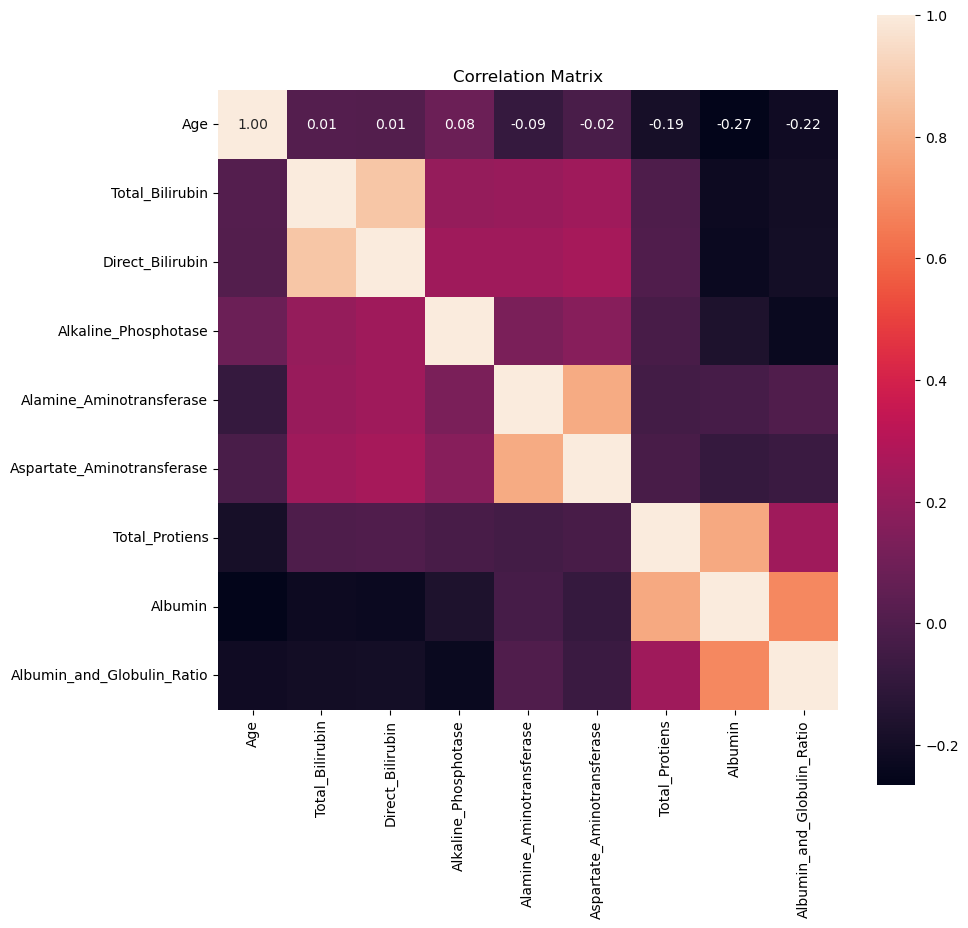

In [56]:
# Select only numeric columns
numeric_features = liver_data_features.select_dtypes(include=[np.number])

# Calculate correlation coefficients for numeric features
correlations = numeric_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


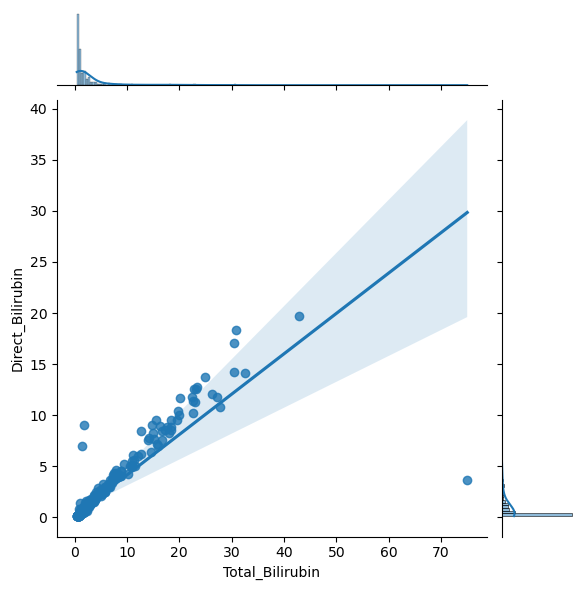

In [62]:
import seaborn as sns

# Updated syntax with keyword arguments
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_data, kind="reg")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


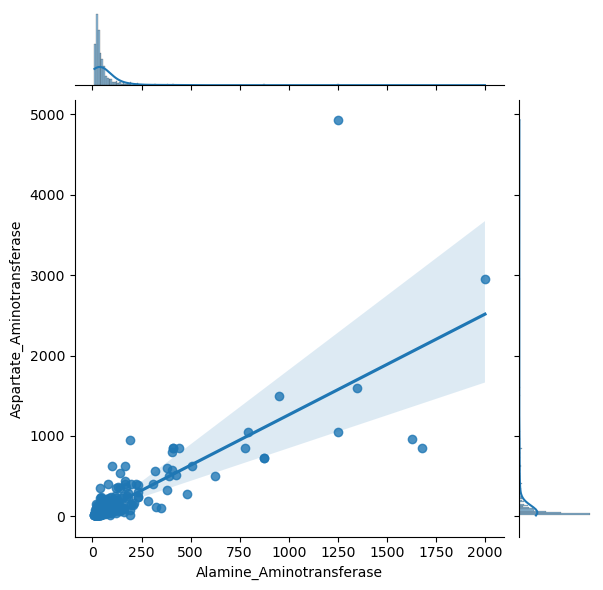

In [64]:

# Updated syntax with keyword arguments for sns.jointplot
sns.jointplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", data=liver_data, kind="reg")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


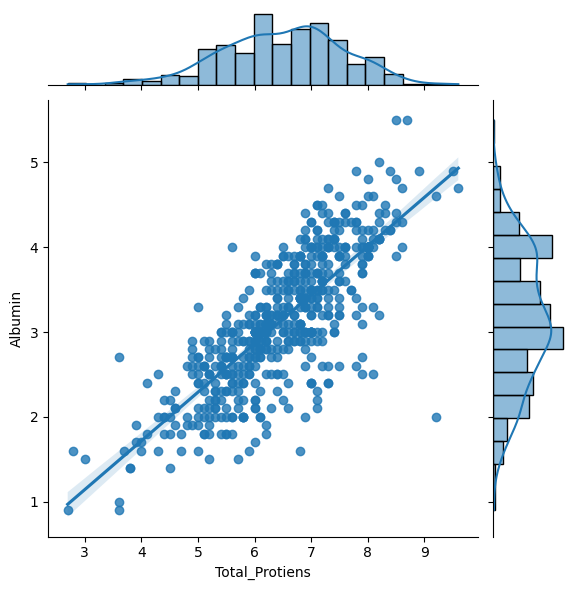

In [68]:
sns.jointplot(x="Total_Protiens", y="Albumin", data=liver_data, kind="reg")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


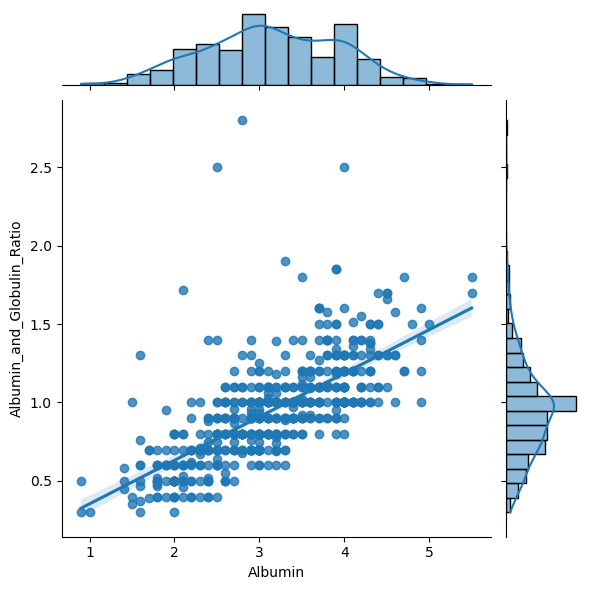

In [70]:
sns.jointplot(x = "Albumin", y = "Albumin_and_Globulin_Ratio", data=liver_data, kind="reg")  

Based on the correlation plots, the following pairs of features seem to be related:
- Total_Bilirubin & Direct_Bilirubin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Total_Protiens & Albumin
- Albumin & Albumin_and_Globulin_Ratio

<Axes: xlabel='Gender', ylabel='count'>

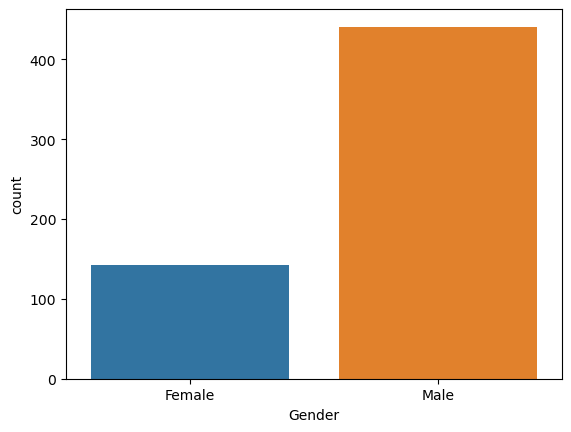

In [73]:
sns.countplot(data=liver_data, x = 'Gender', label='Count')

In [81]:
import joblib

# Load the trained logistic regression model
lr = joblib.load('liver_disease_model.pkl')  # Replace 'liver_disease_model.pkl' with the actual file path
print("Success")

Success


In [97]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Create the model
model = HistGradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [101]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'indian_liver_patient.csv' with your actual dataset file path)
liver_data = pd.read_csv('indian_liver_patient.csv')

# Example preprocessing step: Encode 'Gender' if needed
if 'Gender' in liver_data.columns:
    liver_data['Gender'] = liver_data['Gender'].map({'Male': 0, 'Female': 1})

# Extract features for training and prediction
features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 
            'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
            'Aspartate_Aminotransferase', 'Total_Protiens', 
            'Albumin', 'Albumin_and_Globulin_Ratio']

# Define the target variable (replace 'Dataset' with the actual column name for the target)
target = 'Dataset'

# Ensure the feature columns and target column are present in the dataset
liver_data_features = liver_data[features]
liver_data_target = liver_data[target].map({1: 1, 2: 0})  # Assuming 1 indicates liver disease and 2 indicates no liver disease

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(liver_data_features, liver_data_target, test_size=0.2, random_state=42)

# Create the HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the trained model
prediction_proba = model.predict_proba(X_test)[:, 1]  # Probability for liver disease

# Set a custom threshold for classification
threshold = 0.7
predictions = (prediction_proba >= threshold).astype(int)

# Map predictions to 'Yes' or 'No'
prediction_labels = np.where(predictions == 1, "Liver disease detected", "No liver disease detected")

# Add predictions to the original test DataFrame
X_test['Prediction'] = prediction_labels

# Display the final DataFrame with predictions
print(X_test[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Prediction']])



     Age  Gender  Total_Bilirubin  Direct_Bilirubin                 Prediction
355   19       0              1.4               0.8  No liver disease detected
407   12       0              1.0               0.2     Liver disease detected
90    60       0              5.7               2.8     Liver disease detected
402   42       1              0.5               0.1  No liver disease detected
268   40       0             14.5               6.4     Liver disease detected
..   ...     ...              ...               ...                        ...
516   60       0              0.9               0.3  No liver disease detected
305   54       1              1.4               0.7     Liver disease detected
167   47       1              3.0               1.5     Liver disease detected
312   27       0              1.3               0.6     Liver disease detected
329   21       0              0.7               0.2  No liver disease detected

[117 rows x 5 columns]


In [103]:
import joblib
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming `model` is your trained HistGradientBoostingClassifier
joblib.dump(model, 'liver_disease_model.pkl')
print("Model saved as liver_disease_model.pkl")


Model saved as liver_disease_model.pkl
